In [1]:
from scipy import special
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def bisection(f, a, b, tol):

    fa = f(a)
    fb = f(b);
    count = 1

    if (fa * fb > 0):
        ier = 1
        astar = a

        return [astar, ier,count]

    #   verify end points are not a root
    if (fa == 0):
        astar = a
        ier = 0

        return [astar, ier,count]

    if (fb == 0):
        astar = b
        ier = 0

        return [astar, ier,count]

    
    d = 0.5 * (a + b)
    while (abs(d - a) > tol):
        fd = f(d)
        #print("d = ",d,", n = ", count)
        if (fd == 0):
            astar = d
            ier = 0
            print(astar)
            return [astar, ier,count]
        if (fa * fd < 0):
            b = d
        else:
            a = d
            fa = fd
        d = 0.5 * (a + b)
        count = count + 1
    #      print('abs(d-a) = ', abs(d-a))

    astar = d

    ier = 0

    return [astar, ier,count]

In [3]:
def newton_method1(f,df,x0,tol,nmax,verb=False):
    #newton method to find root of f starting at guess x0

    #Initialize iterates and iterate list
    xn=x0;
    rn=np.array([x0]);
    # function evaluations
    fn=f(xn); dfn=df(xn);
    nfun=2; #evaluation counter nfun
    dtol=1e-10; #tolerance for derivative (being near 0)

    if abs(dfn)<dtol:
        #If derivative is too small, Newton will fail. Error message is
        #displayed and code terminates.
        if verb:
            fprintf('\n derivative at initial guess is near 0, try different x0 \n');
    else:
        n=0;
        if verb:
            print("\n|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|");

        #Iteration runs until f(xn) is small enough or nmax iterations are computed.

        while n<=nmax:
            if verb:
                print("|--%d--|%1.8f|%1.8f|%1.8f|" %(n,xn,np.abs(fn),np.abs(dfn)));

            pn = - fn/dfn; #Newton step
            if np.abs(pn)<tol or np.abs(fn)<2e-15:
                break;

            #Update guess adding Newton step
            xn = xn + pn;

            # Update info and loop
            n+=1;
            rn=np.append(rn,xn);
            dfn=df(xn);
            fn=f(xn);
            nfun+=2;

        r=xn;

        if n>=nmax:
            print("Newton method failed to converge, niter=%d, nfun=%d, f(r)=%1.1e\n'" %(n,nfun,np.abs(fn)));
        else:
            print("Newton method converged succesfully, niter=%d, nfun=%d, f(r)=%1.1e" %(n,nfun,np.abs(fn)));

    return (r,rn,nfun)

In [4]:
def newtons(f,fp,x0,Nmax,tol):
    N = 0
    if fp(x0) == 0:
        print("Error: f'(x)=0. Method Failed. Try another x0 or method.")
        print("Method failed when n = ", N, ", x = ", x0)
    x1 = x0 - f(x0)/fp(x0)
    N = 1
    seq = []

    while np.abs(x1-x0)>tol and N<Nmax:
        seq.append(x0)
        x0 = x1
        x1 = x1 = x0 - f(x0)/fp(x0)
        N = N+1

        if fp(x1) == 0:
            print("Error: f'(x)=0. Method Failed. Try another x0 or method.")
            print("Method failed when n = ", N,", x = ", x1)
            break
    return x1,N,seq

In [5]:
def secantPrint(f,a,b,Nmax,tol):
    p = []
    
    x0 = a
    x1 = b
    n = 0
    print("x0---------,---|x0-x1|-----,log(|x0-x1|)--,N----")
    while np.abs(x0-x1)>tol and n<Nmax:
        print("%0.9f" %x0,", %0.9f" %np.abs(x0-x1),", %0.9f" %np.log10(np.abs(x0-x1)),", ",n)
        p.append(x0)
        x0 = x1
        x1 = x0 - (f(x0)*((x1)-(x0)))/(f(x1)-f(x0))
        n = n+1

    return x0,n,p

In [6]:
def secant_method(f,x0,x1,tol,nmax,verb=False):
    #secant (quasi-newton) method to find root of f starting with guesses x0 and x1
    p = []
    #Initialize iterates and iterate list
    xnm=x0; xn=x1;
    rn=np.array([x1]);
    # function evaluations
    fn=f(xn); fnm=f(xnm);
    msec = (fn-fnm)/(xn-xnm);
    nfun=2; #evaluation counter nfun
    dtol=1e-10; #tolerance for derivative (being near 0)

    if np.abs(msec)<dtol:
        #If slope of secant is too small, secant will fail. Error message is
        #displayed and code terminates.
        if verb:
            fprintf('\n slope of secant at initial guess is near 0, try different x0,x1 \n');
    else:
        n=0;
        if verb:
            print("\n|--n--|----xn----|---|f(xn)|---|---|msec|---|");

        #Iteration runs until f(xn) is small enough or nmax iterations are computed.

        while n<=nmax:
            
            if verb:
                #print("|--%d--|%1.8f|%1.8f|%1.8f|" %(n,xn,np.abs(fn),np.abs(msec)));
                a=1+1
                
            pn = - fn/msec; #Secant step
            if np.abs(pn)<tol or np.abs(fn)<2e-15:
                break;

            #Update guess adding Newton step, update xn-1
            p.append(xn)
            xnm = xn; #xn-1 is now xn
            xn = xn + pn; #xn is now xn+pn

            # Update info and loop
            print("%0.9f" %xn,"& %0.9f" %np.abs(pn),"& %0.9f" %np.log10(np.abs(pn)),"& ",n)
            n+=1;
            rn=np.append(rn,xn);
            fnm = fn; #Note we can re-use this function evaluation
            fn=f(xn); #So, only one extra evaluation is needed per iteration
            msec = (fn-fnm)/(xn-xnm); # New slope of secant line
            nfun+=1;

        r=xn;
        
        if n>=nmax:
            print("Secant method failed to converge, niter=%d, nfun=%d, f(r)=%1.1e\n'" %(n,nfun,np.abs(fn)));
        else:
            print("Secant method converged succesfully, niter=%d, nfun=%d, f(r)=%1.1e" %(n,nfun,np.abs(fn)));

    return (r,rn,nfun,p)

In [7]:
def newtonsPrint(f,fp,x0,Nmax,tol):
    N = 0
    if fp(x0) == 0:
        print("Error: f'(x)=0. Method Failed. Try another x0 or method.")
        print("Method failed when n = ", N, ", x = ", x0)
    x1 = x0 - f(x0)/fp(x0)
    N = 1
    seq = []
    print("x0---------,---|x0-x1|-----,log(|x0-x1|)--,N----")
    while np.abs(x1-x0)>tol/2 and N<Nmax:
        print("%0.9f" %x0,"& %0.9f" %np.abs(x0-x1),"& %0.9f" %np.log10(np.abs(x0-x1)),"& ",N)
        seq.append(x0)
        x0 = x1
        x1 = x1 = x0 - f(x0)/fp(x0)
        N = N+1

        if fp(x1) == 0:
            print("Error: f'(x)=0. Method Failed. Try another x0 or method.")
            print("Method failed when n = ", N,", x = ", x1)
            break
    return x1,N,seq

The depth to not freeze is  0.676961854507681  m
Took  34  iterations. 
The depth to not freeze is  0.676961854462041  m
Took  21  iterations. 
The depth to not freeze is  0.6769618545013728  m
Took  20  iterations. 


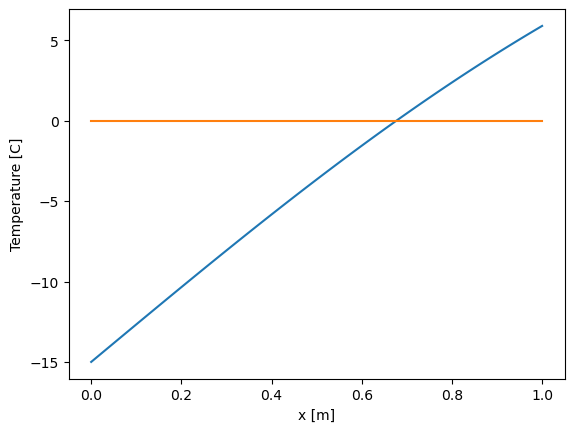

In [8]:
# Problem 1:
Ti = 20
Ts = -15
alpha = 0.138e-6
T = lambda x,t: special.erf(x/(2*np.sqrt(alpha*t)))*(Ti-Ts)+Ts

# Find the value of x when t=60 days

# convert t to seconds so it matches alpha units
ta = 60*3600*24 #s
# solve T = Ta ==> T-Ta = 0
f = lambda x: T(x,ta)
fp = lambda x: 2/(2*np.sqrt(alpha*ta*np.pi))*np.exp(-x**2)*(Ti-Ts)



x = np.linspace(0,1,100)
yaxis = np.zeros((100,1))
plt.plot(x,f(x))
plt.plot(x,yaxis)
plt.xlabel('x [m]')
plt.ylabel('Temperature [C]')


a = 0
b = 1
x0 = 0.01
tol = 1e-10
Nmax = 100
depth,ier,n = bisection(f, a, b, tol)
print("The depth to not freeze is ", depth, " m")
print("Took ", n, " iterations. ")

depth,N,seq = newtons(f,fp,x0,Nmax,tol)
print("The depth to not freeze is ", depth, " m")
print("Took ", N, " iterations. ")

depth,N,seq = newtons(f,fp,b,Nmax,tol)
print("The depth to not freeze is ", depth, " m")
print("Took ", N, " iterations. ")

In [9]:
# Problem 4: 
f = lambda x: np.exp(3*x)-27*x**6+27*x**4*np.exp(x)-9*x**2*np.exp(2*x)
fp = lambda x: 3*np.exp(3*x)-162*x**5+27*x**4*np.exp(x)+108*x**3*np.exp(x)-18*x**2*np.exp(2*x)-18*x*np.exp(2*x)
fpp = lambda x: 9*np.exp(3*x) - 810*x**4 + 27*x**4*np.exp(x) + 216*x**3*np.exp(x) + 324*x**2*np.exp(x) - 18*np.exp(2*x) - 72*x*np.exp(2*x) - 36*x**2*np.exp(2*x)
fppp = lambda x: 27*np.exp(3*x) - 3240*x**3 + 27*x**4*np.exp(x) + 648*x**3*np.exp(x) + 648*x**2*np.exp(x) + 648*x**2*np.exp(x) + 216*x**3*np.exp(x) - 36*np.exp(2*x) - 72*x*np.exp(2*x) - 72*np.exp(2*x) - 72*x*np.exp(2*x) - 72*x*np.exp(2*x) - 36*x**2*np.exp(2*x)
fpppp = lambda x: 81*np.exp(3*x) - 9720*x**2 + 27*x**4*np.exp(x) + 1296*x**3*np.exp(x) + 1296*x**2*np.exp(x) + 648*x**2*np.exp(x) + 648*x**2*np.exp(x) + 216*x**3*np.exp(x) - 72*np.exp(2*x) - 144*x*np.exp(2*x) - 72*np.exp(2*x) - 144*x*np.exp(2*x) - 72*x*np.exp(2*x) - 72*x*np.exp(2*x) - 72*x*np.exp(2*x) - 36*x**2*np.exp(2*x)


a = 3
b = 5

x0 = 3.5
Nmax = 100
tol =1e-25
# i) Newton's Method
rooti,Ni,p = newtonsPrint(f,fp,x0,Nmax,tol)
p_actual = rooti
n = 5

alpha = np.log(np.abs(p[n+1]-p_actual)/np.abs(p[n]-p_actual))/np.log(np.abs((p[n]-p_actual)/np.abs(p[n-1]-p_actual)))
l = np.abs(p[n+1]-p_actual)/np.abs(p[n]-p_actual)**alpha
print("For Newton's Method: alpha = ",alpha, ", lambda = ", l)
print(" ")

# ii) Modified Method from Class
# F(x) = f(x)/f'(x)
F = lambda x: f(x)/fp(x)
Fp = lambda x: 1 - f(x)*fpp(x)/(fp(x)**2)

rootii,Nii,p = newtonsPrint(F,Fp,x0,Nmax,tol)
p_actual = rootii
n = 2
print(fpppp(rootii))
alpha = np.log(np.abs(p[n+1]-p_actual)/np.abs(p[n]-p_actual))/np.log(np.abs((p[n]-p_actual)/np.abs(p[n-1]-p_actual)))
l = np.abs(p[n+1]-p_actual)/np.abs(p[n]-p_actual)**alpha
print("For 1st Modified Newton's Method: alpha = ",alpha, ", lambda = ", l)

# iii) Modified newton's from part 2


x0---------,---|x0-x1|-----,log(|x0-x1|)--,N----
3.500000000 & 0.099997591 & -1.000010461 &  1
3.599997591 & 0.050712922 & -1.294881363 &  2
3.650710514 & 0.029743977 & -1.526600966 &  3
3.680454490 & 0.018443784 & -1.734149969 &  4
3.698898275 & 0.011766433 & -1.929355172 &  5
3.710664708 & 0.007629706 & -2.117492195 &  6
3.718294414 & 0.004996493 & -2.301334716 &  7
3.723290907 & 0.003292477 & -2.482477232 &  8
3.726583384 & 0.002178279 & -2.661886475 &  9
3.728761663 & 0.001444880 & -2.840168323 &  10
3.730206543 & 0.000960040 & -3.017710493 &  11
3.731166583 & 0.000638608 & -3.194765481 &  12
3.731805191 & 0.000425114 & -3.371495064 &  13
3.732230305 & 0.000283132 & -3.548011770 &  14
3.732513436 & 0.000188622 & -3.724408496 &  15
3.732702058 & 0.000125688 & -3.900706416 &  16
3.732827746 & 0.000083814 & -4.076685907 &  17
3.732911559 & 0.000055622 & -4.254755603 &  18
3.732967181 & 0.000037561 & -4.425261508 &  19
3.733004742 & 0.000024290 & -4.614570266 &  20
3.733029032 & 0.0000

Newton's Method
x0---------,---|x0-x1|-----,log(|x0-x1|)--,N----
2.000000000 & 0.319371728 & -0.495703532 &  1
1.680628272 & 0.249889284 & -0.602252367 &  2
1.430738988 & 0.175768032 & -0.755060110 &  3
1.254970956 & 0.093432523 & -1.029501922 &  4
1.161538433 & 0.025185159 & -1.598855310 &  5
1.136353274 & 0.001622746 & -2.789749499 &  6
1.134730528 & 0.000006390 & -5.194509785 &  7

Secant Method

|--n--|----xn----|---|f(xn)|---|---|msec|---|
1.016129032 & 0.016129032 & -1.792391689 &  0
1.190577769 & 0.174448736 & -0.758332172 &  1
1.117655831 & 0.072921938 & -1.137141799 &  2
1.132531550 & 0.014875719 & -1.827522026 &  3
1.134816808 & 0.002285258 & -2.641064802 &  4
1.134723646 & 0.000093162 & -4.030760935 &  5
1.134724138 & 0.000000492 & -6.307732664 &  6
Secant method converged succesfully, niter=7, nfun=9, f(r)=1.1e-09


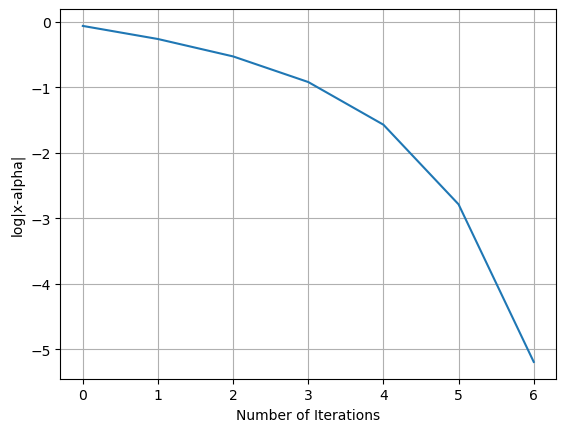

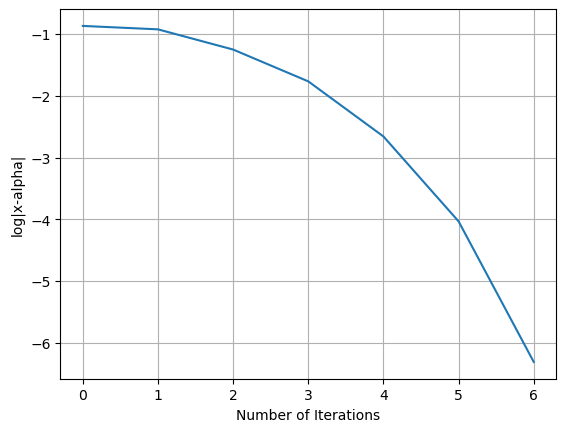

In [19]:
# Problem 5
f = lambda x: x**6 - x - 1
fp = lambda x: 6*x**5 - 1

# using newtons:
x0 = 2
Nmax = 100
tol = 1e-9
print("Newton's Method")
xNewt,nNewt, seqNewt = newtonsPrint(f,fp,x0,Nmax,tol)

xNewt = xNewt*np.ones(len(seqNewt))
errNewt = np.log10(np.abs(seqNewt - xNewt))
plt.figure()
plt.plot(errNewt)
plt.xlabel('Number of Iterations')
plt.ylabel('log|x-alpha|')
plt.grid()

# Using Secant:
a = 2
b = 1
print("\nSecant Method")
xSec,nSec,lSec,seqSec = secant_method(f,a,b,tol,Nmax,True)
xSec = xSec*np.ones(len(seqSec))
errSec = np.log10(np.abs(seqSec - xSec))
plt.figure()
plt.plot(errSec)
plt.xlabel('Number of Iterations')
plt.ylabel('log|x-alpha|')
plt.grid()



Newton method converged succesfully, niter=7, nfun=16, f(r)=1.0e-09
1.016129032 & 0.016129032 & -1.792391689 &  0
1.190577769 & 0.174448736 & -0.758332172 &  1
1.117655831 & 0.072921938 & -1.137141799 &  2
1.132531550 & 0.014875719 & -1.827522026 &  3
1.134816808 & 0.002285258 & -2.641064802 &  4
1.134723646 & 0.000093162 & -4.030760935 &  5
1.134724138 & 0.000000492 & -6.307732664 &  6
Secant method converged succesfully, niter=7, nfun=9, f(r)=1.1e-09
For 1st Modified Newton's Method: alpha =  1.4719174596363513 , lambda =  0.7215334739604241
For 1st Modified Newton's Method: alpha =  1.574424365099342 , lambda =  1.6027406355484517


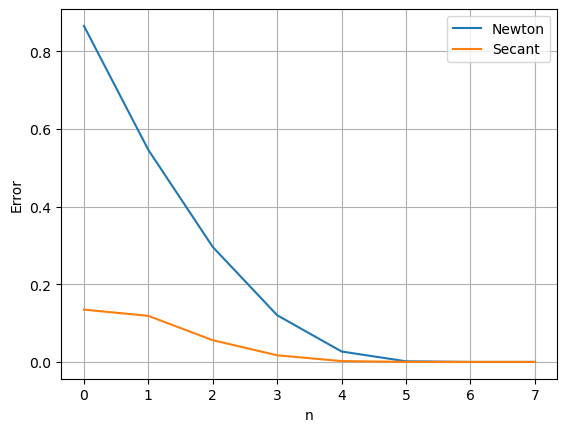

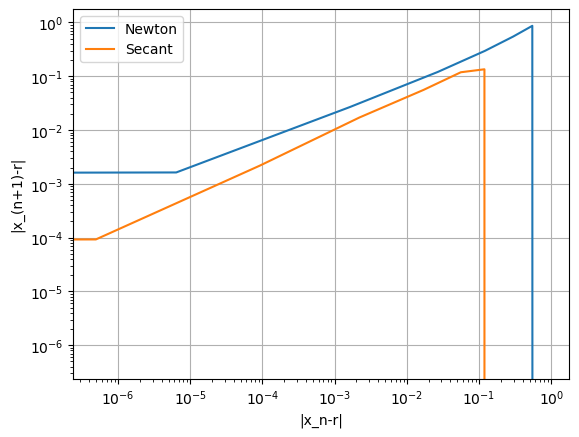

In [37]:
# Creating the plots
r_N, xn_N,n_N = newton_method1(f,fp,2,1e-9,1000)
r_S, xn_S,n_S,p = secant_method(f,2,1,1e-9,1000)



plt.plot(range(8),np.abs(r_N-xn_N),label = "Newton")
plt.plot(range(8),np.abs(r_S-xn_S),label = "Secant")
plt.legend()
plt.xlabel('n')
plt.ylabel('Error')
plt.show
plt.grid()

plt.figure()
plt.loglog(np.abs(xn_N-r_N),np.abs(np.roll(xn_N,1)-r_N),label = "Newton")
plt.loglog(np.abs(xn_S-r_S),np.abs(np.roll(xn_S,1)-r_S),label = "Secant")
plt.xlabel("|x_n-r|")
plt.ylabel("|x_(n+1)-r|")
plt.legend()
plt.grid()

p_actual = r_N
p = xn_N
n = 2

alpha = np.log(np.abs(p[n+1]-p_actual)/np.abs(p[n]-p_actual))/np.log(np.abs((p[n]-p_actual)/np.abs(p[n-1]-p_actual)))
l = np.abs(p[n+1]-p_actual)/np.abs(p[n]-p_actual)**alpha
print("For 1st Modified Newton's Method: alpha = ",alpha, ", lambda = ", l)

p_actual = r_S
p = xn_S
n = 2

alpha = np.log(np.abs(p[n+1]-p_actual)/np.abs(p[n]-p_actual))/np.log(np.abs((p[n]-p_actual)/np.abs(p[n-1]-p_actual)))
l = np.abs(p[n+1]-p_actual)/np.abs(p[n]-p_actual)**alpha
print("For 1st Modified Newton's Method: alpha = ",alpha, ", lambda = ", l)

